<a href="https://colab.research.google.com/github/dikshabhati1/toxic-comment-classifier/blob/main/toxic_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load a file in google colab
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


# Import Libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from collections import Counter
from imblearn.over_sampling import SMOTE

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression,SGDClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# read dataset
df = pd.read_csv('train.csv')

# first few rows
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


So in this notebook we are going to focus on weather a comment is toxic or not.We only need toxic and commment column so we will going to others drop

In [6]:
# drop columns
df.drop(['id','severe_toxic','obscene','threat','insult','identity_hate'],axis=1,inplace=True)

In [7]:
# shape of the dataset
df.shape

(159571, 2)

Let's see weather our dataset is balanced or imbalanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



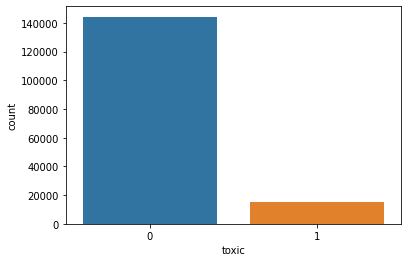

In [8]:
sns.countplot(df['toxic'])

In [9]:
df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

From above we can clearly see that our dataset is imbalanced dataset.We will later handle with it till then we will do data visualization after all first we need to understand our data

# Data Visualization

In [10]:
df['Number_of_words'] = df['comment_text'].apply(lambda x:len(str(x).split()))
df.head()

,comment_text,toxic,Number_of_words
0,Explanation\nWhy the edits made under my usern...,0,43
1,D'aww! He matches this background colour I'm s...,0,17
2,"Hey man, I'm really not trying to edit war. It...",0,42
3,"""\nMore\nI can't make any real suggestions on ...",0,113
4,"You, sir, are my hero. Any chance you remember...",0,13


In [11]:
df.describe()

,toxic,Number_of_words
count,159571.000000,159571.000000
mean,0.095844,67.273527
std,0.294379,99.230702
min,0.000000,1.000000
25%,0.000000,17.000000
50%,0.000000,36.000000
75%,0.000000,75.000000
max,1.000000,1411.000000


From above we can see that we have maximum 1411 words in our sentence and average length is 67.The minimum words in sentence is 1,let's see what are those sentences and how many sentences are there

In [12]:
print('Number of sentences having one word are',len(df[df['Number_of_words']==1]))

Number of sentences having one word are 17


In [13]:
df[df['Number_of_words']==1]['comment_text']

19815                                (www.ebenefits.va.gov)
52442                                                14:53,
52475                     User_talk:Blackson#Religious_bias
53787                         92.24.199.233|92.24.199.233]]
55751                                   Complaints/Mistakes
64904     http://en.wikipedia.org/wiki/Wikipedia_talk:No...
76037     http://finance.yahoo.com/news/7-fascinating-nu...
93586                                          {{unblock|yo
105657    Talk:E%3DMC%C2%B2_(Mariah_Carey_album)#Concern...
106891         http://en.wikipedia.org/wiki/Wikipedia:ELYES
109985                                             {{unbloc
110293    Wikipedia:Administrators%27_noticeboard/Incide...
111438                                   |needs-infobox=yes
117663                                    (talk)/(contribs)
127744                                      User:Wipeouting
130194                        hyper_individualist@yahoo.com
141293    http://www.haaretz.com/news/di

So basically there are link,random words and numbers, so there are no one word sentence having some meaning

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

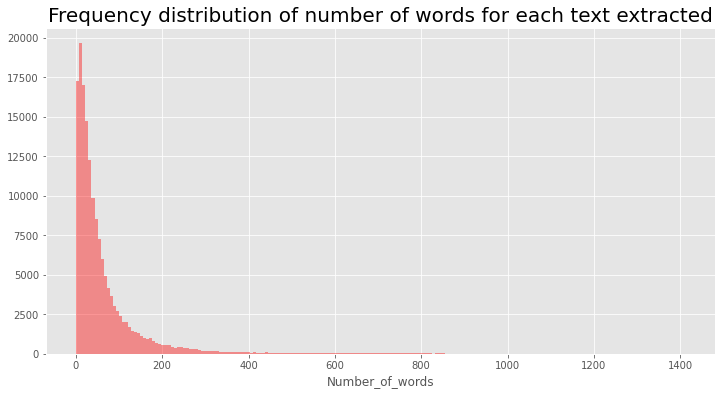

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(df['Number_of_words'],kde = False,color="red",bins=200)
plt.title("Frequency distribution of number of words for each text extracted", size=20)

**Now let's see toxic and non-toxic comments**

In [15]:
# toxic comments
toxic_comments = df[df['toxic'] ==1]['comment_text']
toxic_comments.reset_index(inplace=True,drop=True)
for i in range(5):
    print(toxic_comments[i])

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...
Bye! 

Don't look, come or think of comming back! Tosser.
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in 

In [16]:
# non toxic comments
non_toxic_comments = df[df['toxic'] ==0]['comment_text']
non_toxic_comments.reset_index(inplace=True,drop=True)
for i in range(5):
    print(non_toxic_comments[i])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want 

Number of characters in sentence

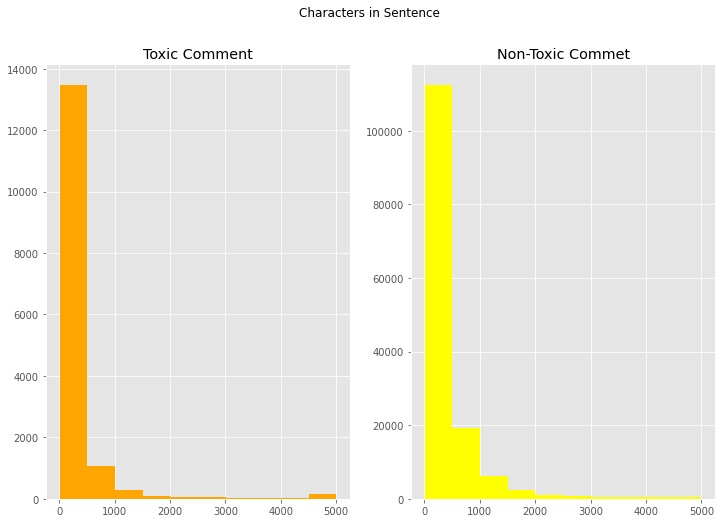

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['toxic']==1]['comment_text'].str.len()
ax1.hist(text_len,color='orange')
ax1.set_title('Toxic Comment')
text_len=df[df['toxic']==0]['comment_text'].str.len()
ax2.hist(text_len,color='yellow')
ax2.set_title('Non-Toxic Commet')
fig.suptitle('Characters in Sentence')
plt.show()

Number of words in each text

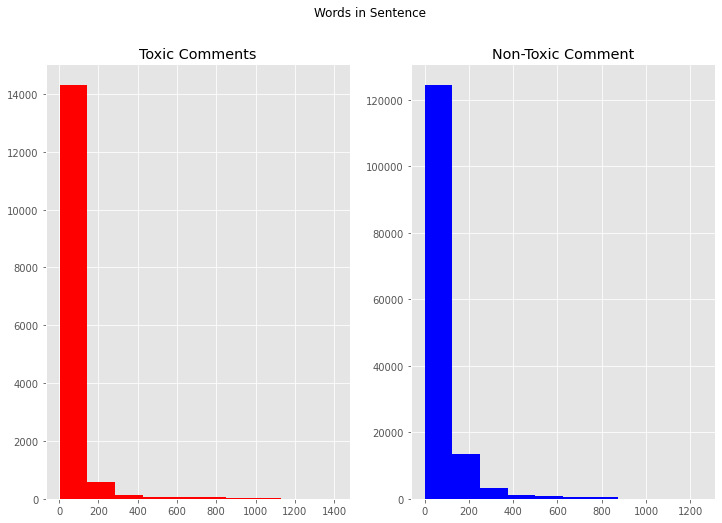

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['toxic']==1]['comment_text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Toxic Comments')
text_len=df[df['toxic']==0]['comment_text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='b')
ax2.set_title('Non-Toxic Comment')
fig.suptitle('Words in Sentence')
plt.show()

### Tri-gram

In [19]:
# toxic
toxic_text = ' '.join(df.loc[df.toxic == 1, 'comment_text'].values)
toxic_text_trigrams = [i for i in ngrams(toxic_text.split(), 3)]
Counter(toxic_text_trigrams).most_common(30)

[(('NIGGER', 'NIGGER', 'NIGGER'), 1876),
 (('hi', 'moron', 'hi'), 1468),
 (('moron', 'hi', 'moron'), 1466),
 (('PIG', 'PIG', 'PIG'), 1248),
 (('FAT', 'JEW', 'FAT'), 1226),
 (('JEW', 'FAT', 'JEW'), 1224),
 (('Bark', 'Bark', 'Bark'), 998),
 (('SHIT', 'SHIT', 'SHIT'), 998),
 (('WANKER', 'WANKER', 'WANKER'), 940),
 (('BALLS', 'BALLS', 'BALLS'), 831),
 (('Go', 'fuck', 'yourself!'), 822),
 (('fuck', 'yourself!', 'Go'), 817),
 (('yourself!', 'Go', 'fuck'), 817),
 (('YOU', 'SUCK', 'YOU'), 730),
 (('SUCK', 'YOU', 'SUCK'), 729),
 (('faggot', 'faggot', 'faggot'), 711),
 (('Nipple', 'Nipple', 'Nipple'), 707),
 (('ass.', 'I', 'ass.'), 677),
 (('I', 'ass.', 'I'), 676),
 (('DIE', 'FAG', 'DIE'), 624),
 (('FAG', 'DIE', 'FAG'), 624),
 (('faggots', 'faggots', 'faggots'), 623),
 (('fucksex', 'fucksex', 'fucksex'), 622),
 (('fuck', 'yourselfgo', 'fuck'), 621),
 (('your', 'a', 'dickhead'), 620),
 (('a', 'dickhead', 'your'), 619),
 (('dickhead', 'your', 'a'), 619),
 (('yourselfgo', 'fuck', 'yourselfgo'), 619

In [20]:
# non-toxic
non_toxic_text = ' '.join(df.loc[df.toxic == 0, 'comment_text'].values)
non_toxic_text_trigrams = [i for i in ngrams(non_toxic_text.split(), 3)]
Counter(non_toxic_text_trigrams).most_common(30)

[(('Thank', 'you', 'for'), 3091),
 (('would', 'like', 'to'), 2866),
 (('Please', 'do', 'not'), 2798),
 (('is', 'not', 'a'), 2503),
 (('one', 'of', 'the'), 2465),
 (('If', 'you', 'have'), 2263),
 (('on', 'my', 'talk'), 2252),
 (('you', 'want', 'to'), 2235),
 (('I', 'hope', 'you'), 2136),
 (('you', 'will', 'be'), 2106),
 (('be', 'blocked', 'from'), 2057),
 (('you', 'have', 'any'), 2047),
 (('a', 'lot', 'of'), 1982),
 (('you', 'for', 'your'), 1957),
 (('I', 'am', 'not'), 1935),
 (('you', 'continue', 'to'), 1909),
 (('will', 'be', 'blocked'), 1865),
 (('there', 'is', 'no'), 1860),
 (('to', 'be', 'a'), 1820),
 (('If', 'you', 'continue'), 1819),
 (('look', 'at', 'the'), 1731),
 (('the', 'fact', 'that'), 1724),
 (('I', 'do', 'not'), 1668),
 (('a', 'look', 'at'), 1662),
 (('to', 'the', 'article'), 1627),
 (('as', 'well', 'as'), 1615),
 (('you', 'would', 'like'), 1610),
 (('there', 'is', 'a'), 1574),
 (('part', 'of', 'the'), 1534),
 (('of', 'the', 'article'), 1523)]

# WordCloud

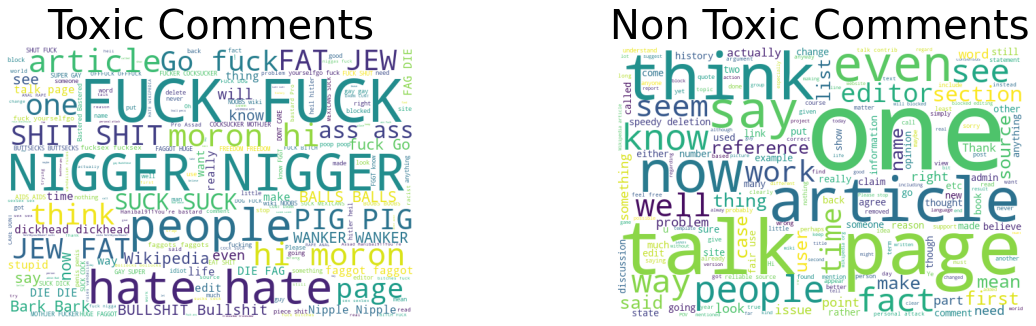

In [21]:
# word cloud of toxic and non-toxic comment
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 5])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(toxic_comments))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Toxic Comments',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_toxic_comments))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Toxic Comments',fontsize=40);

# Data Cleaning

It's time to clean our dataset

In [24]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [25]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['comment_text']=df['comment_text'].apply(denoise_text)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning:

"http://en.wikipedia.org/wiki/Wikipedia_talk:No_original_research/archive15#YouTube_art_as_primary_source" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning:

"http://finance.yahoo.com/news/7-fascinating-nuggets-another-bewildering-150348488.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning:

"http://en.wikipedia.org/wiki/Wikipedia:ELYES" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that 

Let's see our cleaned data

In [27]:
print('ORIGINAL SENTENCE :',non_toxic_comments[0])
print('-'*100)
print('CLEANED SENTENCE :',df['comment_text'][0])

ORIGINAL SENTENCE : Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
----------------------------------------------------------------------------------------------------
CLEANED SENTENCE : explanation edits made username hardcore metallica fan closure gas voted new york dolls please remove template talk page since retired


# Model

In [28]:
# dependent and independent variable
X = df['comment_text']
y = df['toxic']

In [29]:
# countvectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

We have to handle our dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



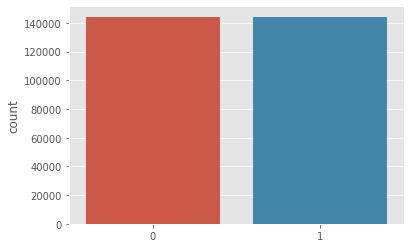

In [30]:
smote = SMOTE(random_state = 402)
X_smote, Y_smote = smote.fit_resample(X,y)

sns.countplot(Y_smote)

In [31]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size = 0.20, random_state = 0)

### Logistic Regression

In [42]:
lr = LogisticRegression(C=1.0)
#Fitting the model 
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# Predicting the Test set results
y_pred_lr = lr.predict(X_test)

In [44]:
# Accuracy, Precision,f1 and Recall
score1 = accuracy_score(y_test,y_pred_lr)
score2 = precision_score(y_test,y_pred_lr)
score3= recall_score(y_test,y_pred_lr)
score4 = f1_score(y_test,y_pred_lr)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))
print("F1 Score score is: {}".format(round(score4,2)))

---- Scores ----
Accuracy score is: 91.31%
Precision score is: 0.88
Recall score is: 0.96
F1 Score score is: 0.92


### Naive Bayes

In [45]:
# Fitting Naive Bayes to the Training set
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
# Predicting the Test set results
y_pred_nb = classifier.predict(X_test)

In [47]:
# Accuracy, Precision,f1 and Recall
score1 = accuracy_score(y_test,y_pred_nb)
score2 = precision_score(y_test,y_pred_nb)
score3 = recall_score(y_test,y_pred_nb)
score4 = f1_score(y_test,y_pred_nb)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))
print("F1 Score score is: {}".format(round(score4,2)))

---- Scores ----
Accuracy score is: 79.34%
Precision score is: 0.95
Recall score is: 0.62
F1 Score score is: 0.75


### XgbClassifier

In [48]:
# xgbClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [49]:
# Predicting the Test set results
y_pred_xg = classifier.predict(X_test)

In [50]:
# Accuracy, Precision,f1 and Recall
score1 = accuracy_score(y_test,y_pred_xg)
score2 = precision_score(y_test,y_pred_xg)
score3= recall_score(y_test,y_pred_xg)
score4 = f1_score(y_test,y_pred_nb)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))
print("F1 Score score is: {}".format(round(score4,2)))

---- Scores ----
Accuracy score is: 79.34%
Precision score is: 0.95
Recall score is: 0.62
F1 Score score is: 0.75


So our best model is logistic regression model